In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [ ]:
file_path = '/content/EWS.csv'
data = pd.read_csv(file_path)

In [ ]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Y            0
Data         0
XAU BGNL     0
ECSURPUS     0
BDIY         0
CRY          0
DXY          0
JPY          0
GBP          0
Cl1          0
VIX          0
USGG30YR     0
GT10         0
USGG2YR      0
USGG3M       0
US0001M      0
GTDEM30Y     0
GTDEM10Y     0
GTDEM2Y      0
EONIA        0
GTITL30YR    0
GTITL10YR    0
GTITL2YR     0
GTJPY30YR    0
GTJPY10YR    0
GTJPY2YR     0
GTGBP30Y     0
GTGBP20Y     0
GTGBP2Y      0
LUMSTRUU     0
LMBITR       0
LUACTRUU     0
LF98TRUU     0
LG30TRUU     0
LP01TREU     0
EMUSTRUU     0
LF94TRUU     0
MXUS         0
MXEU         0
MXJP         0
MXBR         0
MXRU         0
MXIN         0
MXCN         0
dtype: int64


In [ ]:
# Basic statistics
print("\nDataset Statistics:\n", data.describe())


Dataset Statistics:
                  Y     XAU BGNL     ECSURPUS          BDIY          CRY  \
count  1111.000000  1111.000000  1111.000000   1111.000000  1111.000000   
mean      0.213321   987.463744     0.036153   2259.860486   245.247670   
std       0.409837   494.623740     0.349453   2017.811888    68.278066   
min       0.000000   256.680000    -0.974000    291.000000   106.293000   
25%       0.000000   433.740000    -0.191000    990.000000   184.705550   
50%       0.000000  1137.800000     0.035000   1518.000000   234.560000   
75%       0.000000  1324.825000     0.260500   2685.500000   301.539500   
max       1.000000  2006.910000     0.991000  11793.000000   467.570000   

               DXY          JPY          GBP          Cl1          VIX  ...  \
count  1111.000000  1111.000000  1111.000000  1111.000000  1111.000000  ...   
mean     90.934982   106.605734     1.569661    60.708101    19.992169  ...   
std      11.379095    12.840754     0.212344    25.900813     8.6

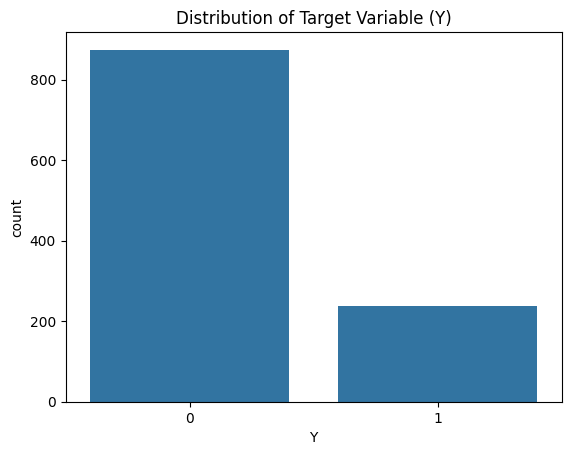

In [ ]:
# Target variable distribution
sns.countplot(x='Y', data=data)
plt.title('Distribution of Target Variable (Y)')
plt.show()

In [ ]:
# Convert 'Data' column to datetime and extract features
data['Data'] = pd.to_datetime(data['Data'])
data['Year'] = data['Data'].dt.year
data['Month'] = data['Data'].dt.month
data['Day'] = data['Data'].dt.day
data = data.drop(columns=['Data'])  # Drop the original 'Data' column

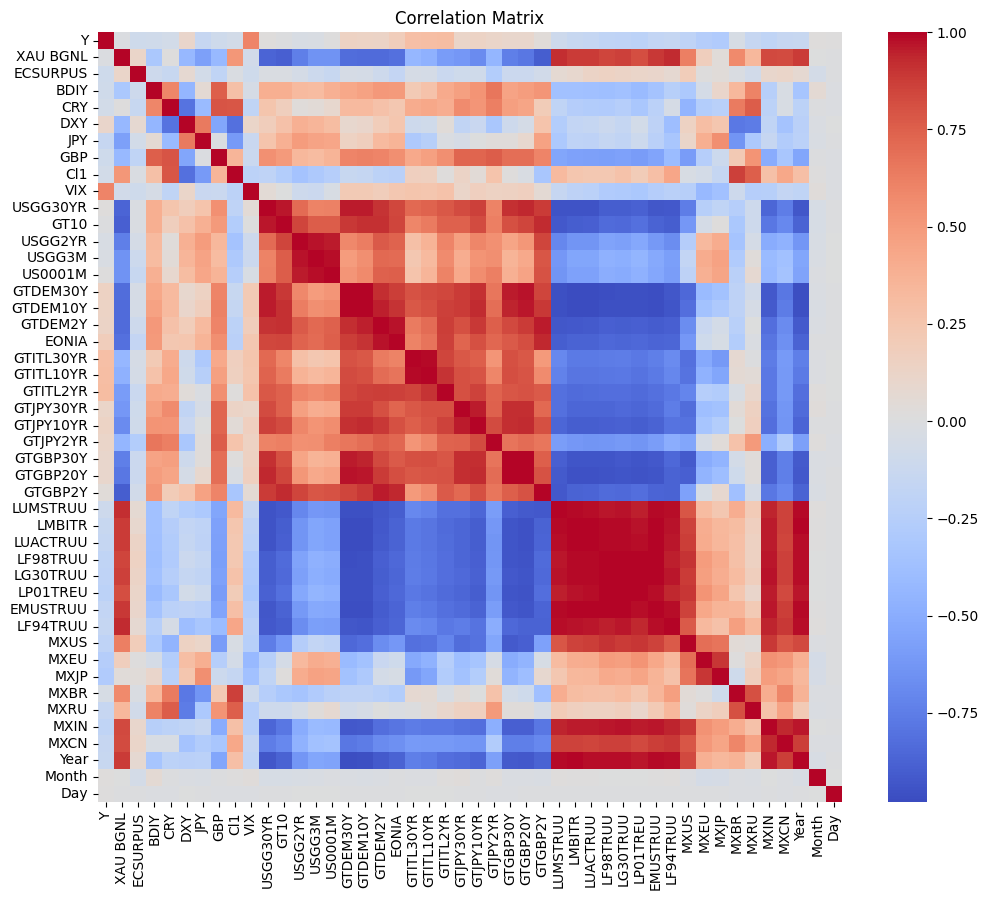

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 10))
# Extract numerical features for correlation
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Identify top correlated features with the target (Y)
target_corr = correlation_matrix['Y'].sort_values(ascending=False)
print("\nTop Correlated Features with Y:\n", target_corr.head(15))


Top Correlated Features with Y:
 Y            1.000000
VIX          0.598432
GTITL2YR     0.304528
GTITL10YR    0.297573
GTITL30YR    0.295000
EONIA        0.180311
GTDEM30Y     0.141537
GTDEM10Y     0.139933
GTJPY10YR    0.133660
GTDEM2Y      0.130607
GTJPY30YR    0.114555
GTJPY2YR     0.112314
DXY          0.103227
GTGBP20Y     0.100142
GTGBP30Y     0.099777
Name: Y, dtype: float64


In [ ]:
# Add a moving average feature
data['GTITL2YR_MA'] = data['GTITL2YR'].rolling(window=4).mean()
data['GTITL10YR_MA'] = data['GTITL10YR'].rolling(window=4).mean()
data.dropna(inplace=True)

In [ ]:
# Select a subset of features for modeling
selected_features = ['VIX','DXY','GTITL2YR_MA','GTITL10YR_MA']  # Update this based on correlation
X = data[selected_features]
y = data['Y']


In [ ]:
# Split data chronologically (no shuffle)
train_size = int(0.5 * len(data))  # 50% training, 50% testing
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [ ]:
# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 4: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Predictions and probabilities
y_pred = model.predict(X_test_scaled) # Ensure y_pred is generated using the same X_test_scaled used for evaluation
y_prob = model.predict_proba(X_test_scaled)[:, 1]
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       462
           1       0.94      0.32      0.47        92

    accuracy                           0.88       554
   macro avg       0.91      0.66      0.70       554
weighted avg       0.89      0.88      0.86       554



In [ ]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]
# Adjust the dec1
threshold = 0.55
y_pred = (y_prob >= threshold).astype(int)



Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       461
           1       0.68      0.67      0.68        92

    accuracy                           0.89       553
   macro avg       0.81      0.81      0.81       553
weighted avg       0.89      0.89      0.89       553


ROC-AUC Score: 0.8984249740639442


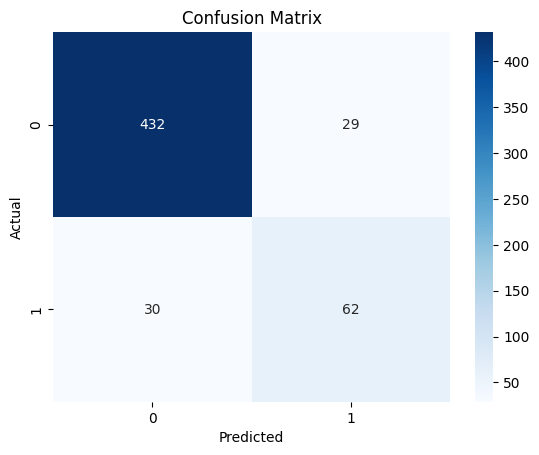

In [ ]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_auc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Oversample the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Train Logistic Regression on the balanced data
model_balanced = LogisticRegression()
model_balanced.fit(X_train_balanced, y_train_balanced)

# Evaluate
y_pred_balanced = model_balanced.predict(X_test_scaled)
y_prob_balanced = model_balanced.predict_proba(X_test_scaled)[:, 1]
print("\nClassification Report (Balanced Model):\n", classification_report(y_test, y_pred_balanced))



Classification Report (Balanced Model):
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       462
           1       0.95      0.41      0.58        92

    accuracy                           0.90       554
   macro avg       0.92      0.70      0.76       554
weighted avg       0.90      0.90      0.88       554



In [ ]:
# Calculate ROC-AUC score
roc_auc_balanced = roc_auc_score(y_test, y_prob_balanced)
print("\nROC-AUC Score (Balanced Model):", roc_auc_balanced)



ROC-AUC Score (Balanced Model): 0.8922219085262564


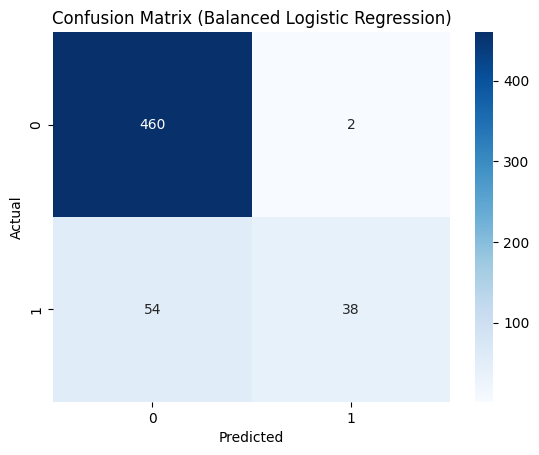

In [ ]:
# Generate confusion matrix
cm_balanced = confusion_matrix(y_test, y_pred_balanced)

# Plot confusion matrix heatmap
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Balanced Logistic Regression)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# Train XGBoost Model
from xgboost import XGBClassifier
xgb_model = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_model.fit(X_train_scaled, y_train)

# Evaluate XGBoost Model
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
print("Classification Report (XGBoost):", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score (XGBoost):", roc_auc_score(y_test, y_prob_xgb))

Classification Report (XGBoost):               precision    recall  f1-score   support

           0       0.92      0.91      0.92       462
           1       0.58      0.62      0.60        92

    accuracy                           0.86       554
   macro avg       0.75      0.77      0.76       554
weighted avg       0.87      0.86      0.86       554

ROC-AUC Score (XGBoost): 0.8904808959156787


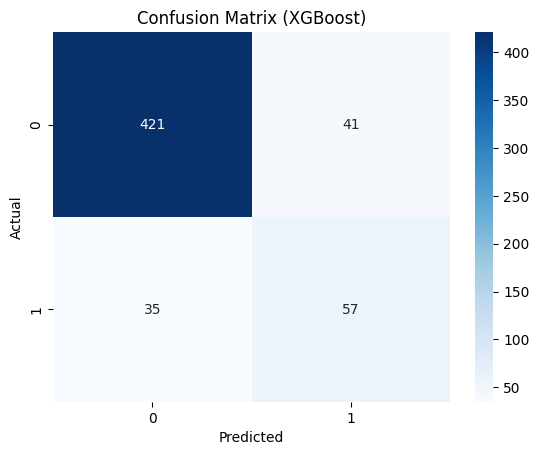

In [ ]:
# Generate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix heatmap
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (XGBoost)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


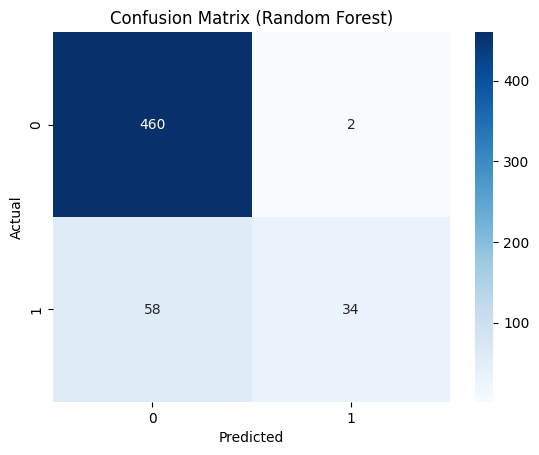

Classification Report (Random Forest):               precision    recall  f1-score   support

           0       0.89      1.00      0.94       462
           1       0.94      0.37      0.53        92

    accuracy                           0.89       554
   macro avg       0.92      0.68      0.74       554
weighted avg       0.90      0.89      0.87       554

ROC-AUC Score (Random Forest): 0.8780702992659514


In [ ]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Perform Grid Search for Random Forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, scoring='roc_auc', cv=3)
grid_rf.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_rf.best_params_)

# Evaluate Random Forest Model
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("Classification Report (Random Forest):", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score (Random Forest):", roc_auc_score(y_test, y_prob_rf))

In [ ]:
# Train Isolation Forest for anomaly detection
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train_scaled)
model.fit(X_train_scaled, y_train)

# Evaluate Isolation Forest
iso_pred = iso_forest.predict(X_test_scaled)
# Map Isolation Forest output (-1 to anomaly, 1 to normal)
iso_pred = [0 if x == -1 else 1 for x in iso_pred]
print("Classification Report (Isolation Forest):", classification_report(y_test, iso_pred))


Classification Report (Isolation Forest):               precision    recall  f1-score   support

           0       0.81      0.79      0.80       462
           1       0.05      0.05      0.05        92

    accuracy                           0.67       554
   macro avg       0.43      0.42      0.43       554
weighted avg       0.68      0.67      0.67       554



In [ ]:
# Train Logistic Regression with class weights
model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train_scaled, y_train)

# Evaluate the weighted model
y_pred_weighted = model_weighted.predict(X_test_scaled)
print("Classification Report (Weighted Model):", classification_report(y_test, y_pred_weighted))

Classification Report (Weighted Model):               precision    recall  f1-score   support

           0       0.90      1.00      0.94       462
           1       0.95      0.43      0.60        92

    accuracy                           0.90       554
   macro avg       0.93      0.72      0.77       554
weighted avg       0.91      0.90      0.89       554



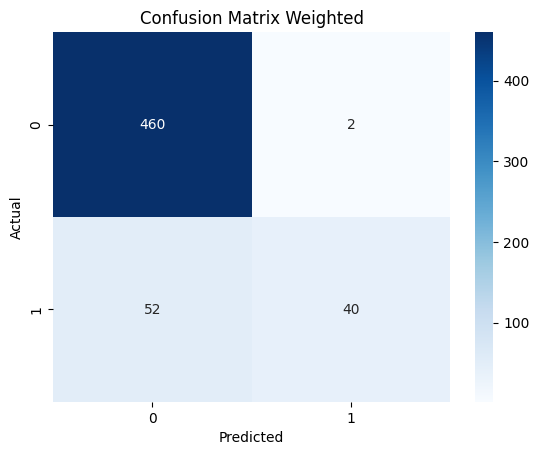

In [ ]:
# Confusion matrix
cmw = confusion_matrix(y_test, y_pred_weighted)
sns.heatmap(cmw, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Weighted')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
import joblib

# Save Logistic Regression Model
joblib.dump(model, 'logistic_regression_model.pkl')

# Save Weighted Logistic Regression Model
joblib.dump(model_weighted, 'logistic_regression_weighted_model.pkl')

# Save XGBoost Model
joblib.dump(xgb_model, 'xgboost_model.pkl')

# Save Random Forest Model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save Isolation Forest Model
joblib.dump(iso_forest, 'isolation_forest_model.pkl')


['isolation_forest_model.pkl']

In [ ]:
from sklearn.preprocessing import StandardScaler
# Save the scaler
joblib.dump(scaler, '/content/scaler.pkl')  # Save to a file

['/content/scaler.pkl']

In [ ]:
# Step 6: Feature Importance
# Logistic Regression coefficients
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)



Feature Importance:
         Feature  Importance
0           VIX    2.450268
2   GTITL2YR_MA    0.450500
3  GTITL10YR_MA    0.396123
1           DXY   -0.116310


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/EWS.csv'  # Ensure this is the correct file path in Colab
data = pd.read_csv(file_path)

In [ ]:
import joblib

# Load the model
model = joblib.load('/content/logistic_regression_model.pkl')

# Confirm model is loaded
print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
# Ensure the dataset is split the same way
train_size = int(0.5 * len(data))

X_train = data.iloc[:train_size, 1:]  # Exclude 'Y' column
y_train = data.iloc[:train_size, 0]  # First column for training

X_test = data.iloc[train_size:, 1:]  # Exclude 'Y' column
y_test = data.iloc[train_size:, 0]  # First column for testing

In [ ]:
# Exclude the 'Y' column for predictions
X_test_features = X_test.copy()

In [ ]:
# Convert 'Data' column to datetime
X_test_features['Data'] = pd.to_datetime(X_test_features['Data'])

# Extract numeric features
X_test_features['Year'] = X_test_features['Data'].dt.year
X_test_features['Month'] = X_test_features['Data'].dt.month
X_test_features['Day'] = X_test_features['Data'].dt.day

# Drop the original 'Data' column
X_test_features = X_test_features.drop(columns=['Data'])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply the scaler used during training
scaler = StandardScaler()
# Apply moving averages to the test data
X_test['GTITL2YR_MA'] = X_test['GTITL2YR'].rolling(window=4).mean()
X_test['GTITL10YR_MA'] = X_test['GTITL10YR'].rolling(window=4).mean()

# Drop rows with missing values
X_test.dropna(inplace=True)
y_test = y_test[X_test.index]  # Align y_test with X_test

# Select the same features as used in training
selected_features = ['VIX', 'DXY','GTITL2YR_MA', 'GTITL10YR_MA']
X_test = X_test[selected_features]
X_test_scaled = scaler.fit_transform(X_test)  # Use the same scaler object

In [ ]:
print(X_test.dtypes)


VIX             float64
DXY             float64
GTITL2YR_MA     float64
GTITL10YR_MA    float64
dtype: object


In [ ]:
# Generate predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Set the custom threshold
threshold = 0.7

# Apply the custom threshold
y_pred_threshold = (y_prob >= threshold).astype(int)  # Classify as 1 if probability >= threshold, else 0

# Compare predictions with actual values
comparison = pd.DataFrame({
    'Actual': y_test.values,       # Actual labels
    'Predicted': y_pred_threshold,      # Predicted labels with custom threshold

    'Probability': y_prob          # Prediction probabilities
})

# Display the first few rows of comparison
print(comparison.head())


   Actual  Predicted  Probability
0       0          0     0.339397
1       0          0     0.472384
2       0          0     0.436155
3       0          0     0.562704
4       0          0     0.366630


In [ ]:
# Define investment strategy based on predictions
def investment_strategy(probability):
    if probability > 0.7:
        return "Move to safer investments (bonds, gold, cash)"
    elif probability < 0.3:
        return "Maintain high-risk portfolio (equities)"
    else:
        return "Diversify portfolio to balance risk"

# Apply the strategy to the test dataset
comparison['Strategy'] = comparison['Probability'].apply(investment_strategy)
print(comparison[['Actual', 'Predicted', 'Probability', 'Strategy']].head())


   Actual  Predicted  Probability                             Strategy
0       0          0     0.618354  Diversify portfolio to balance risk
1       0          0     0.647315  Diversify portfolio to balance risk
2       0          0     0.571480  Diversify portfolio to balance risk
3       0          0     0.321124  Diversify portfolio to balance risk
4       0          0     0.464586  Diversify portfolio to balance risk



Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       461
           1       0.64      0.71      0.67        92

    accuracy                           0.88       553
   macro avg       0.79      0.81      0.80       553
weighted avg       0.89      0.88      0.89       553


ROC-AUC Score: 0.8984249740639442


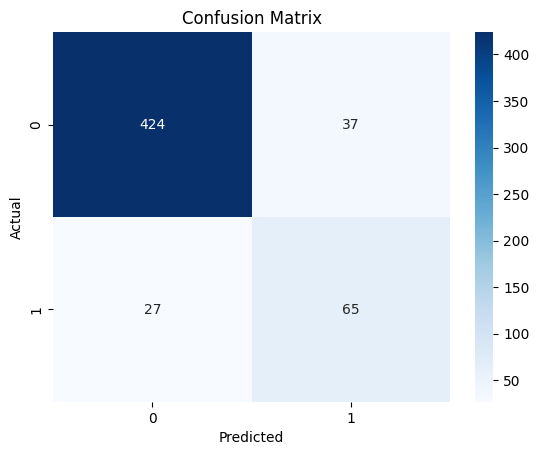

In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_auc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
!pip install yfinance
!pip install beautifulsoup4

In [ ]:
import yfinance as yf
import pandas as pd


In [ ]:
# Step 1: Fetch current or EOD prices
tickers = {
    'VIX': '^VIX',        # Volatility Index
    'DXY': 'DX-Y.NYB'     # US Dollar Index
}

# Fetch current prices
current_data = {}
for name, ticker in tickers.items():
    data = yf.Ticker(ticker)
    history = data.history(period="1d")  # Get EOD or latest price
    if not history.empty:
        current_data[name] = history['Close'].iloc[-1]  # Latest closing price
    else:
        current_data[name] = None  # Handle missing data

print("Current Prices:")
print(current_data)


Current Prices:
{'VIX': 19.540000915527344, 'DXY': 109.7239990234375}


In [ ]:
# Define tickers for GTITL2YR and GTITL10YR (these may not be directly available in yfinance)
moving_average_tickers = {
    'GTITL2YR': '^IRX',   # 2-Year Treasury Yield
    'GTITL10YR': '^TNX'   # 10-Year Treasury Yield
}

# Fetch historical data for the past 30 days
historical_data = {}
for name, ticker in moving_average_tickers.items():
    data = yf.Ticker(ticker)
    history = data.history(period="1mo")  # Fetch last 30 days
    if not history.empty:
        historical_data[name] = history['Close']  # Get closing prices
    else:
        historical_data[name] = None  # Handle missing data

# Combine historical data into a DataFrame
df = pd.DataFrame(historical_data)

# Calculate 4-week (30-day) moving averages
df['GTITL2YR_MA'] = df['GTITL2YR'].rolling(window=4).mean()
df['GTITL10YR_MA'] = df['GTITL10YR'].rolling(window=4).mean()

# Get the latest moving averages
latest_averages = {
    'GTITL2YR_MA': df['GTITL2YR_MA'].iloc[-1],
    'GTITL10YR_MA': df['GTITL10YR_MA'].iloc[-1]
}

print("\nLatest Moving Averages:")
print(latest_averages)


Latest Moving Averages:
{'GTITL2YR_MA': 4.202749967575073, 'GTITL10YR_MA': 4.692499995231628}


In [ ]:
# Step 3: Combine current prices and moving averages into input data
input_data = {
    'VIX': current_data['VIX'],
    'DXY': current_data['DXY'],
    'GTITL2YR_MA': latest_averages['GTITL2YR_MA'],
    'GTITL10YR_MA': latest_averages['GTITL10YR_MA']
}

# Handle missing values
for key, value in input_data.items():
    if value is None:
        print(f"Warning: Missing value for {key}")
        input_data[key] = 0  # Fallback to 0 or another default value

# Convert to DataFrame
input_df = pd.DataFrame([input_data])
print("\nInput Data for Prediction:")
print(input_df)


Input Data for Prediction:
         VIX         DXY  GTITL2YR_MA  GTITL10YR_MA
0  19.540001  109.723999      4.20275        4.6925


In [ ]:
# Step 4: Predict using the trained model (load your model first)
import joblib

# Load the trained model (ensure the .pkl file is uploaded to Colab)
model = joblib.load('/content/logistic_regression_model.pkl')  # Update the file path if necessary
# Load the scaler
scaler = joblib.load('/content/scaler.pkl')

# Scale the input data using the loaded scaler
input_data_scaled = scaler.transform(input_df)

# Generate predictions
predicted_label = model.predict(input_data_scaled)  # Binary label prediction
predicted_prob = model.predict_proba(input_data_scaled)[:, 1]  # Probability of class 1

threshold=0.7
predicted_label = (predicted_prob >= threshold).astype(int)  # Classify as 1 if probability >= threshold

# Display results
print("\nPredicted Label (with threshold):", predicted_label)
print("Predicted Probability:", predicted_prob)



Predicted Label (with threshold): [0]
Predicted Probability: [0.11076617]


In [ ]:
import pandas as pd

# Assuming `input_data` is already a pandas DataFrame
# Add predictions and probabilities
input_df['Predicted'] = predicted_label  # Ensure `predicted_label` is not a NumPy array but a list or Series
input_df['Probability'] = predicted_prob  # Ensure `predicted_prob` is not a NumPy array but a list or Series

# Define investment strategy based on predictions
def investment_strategy(probability):
    if probability > 0.7:
        return "Move to safer investments (bonds, gold, cash)"
    elif probability < 0.3:
        return "Maintain high-risk portfolio (equities)"
    else:
        return "Diversify portfolio to balance risk"

# Convert `Probability` to a pandas Series if needed
input_df['Probability'] = pd.Series(input_data['Probability'])

# Apply the investment strategy
input_df['Strategy'] = input_data['Probability'].apply(investment_strategy)

# Display the updated DataFrame
print("\nPredictions and Investment Strategy:")
print(input_df[['VIX', 'DXY', 'GTITL2YR_MA', 'GTITL10YR_MA', 'Predicted', 'Probability', 'Strategy']])



Predictions and Investment Strategy:
         VIX         DXY  GTITL2YR_MA  GTITL10YR_MA  Predicted  Probability  \
0  19.540001  109.723999      4.20275        4.6925          0     0.110766   

                                  Strategy  
0  Maintain high-risk portfolio (equities)  
